In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import

import warnings
warnings.filterwarnings('ignore')

##1. Write a Python Script to visualize the distribution of erros(residuals) for a multiple Linear Regression model using Seaborn's diamond dataset.

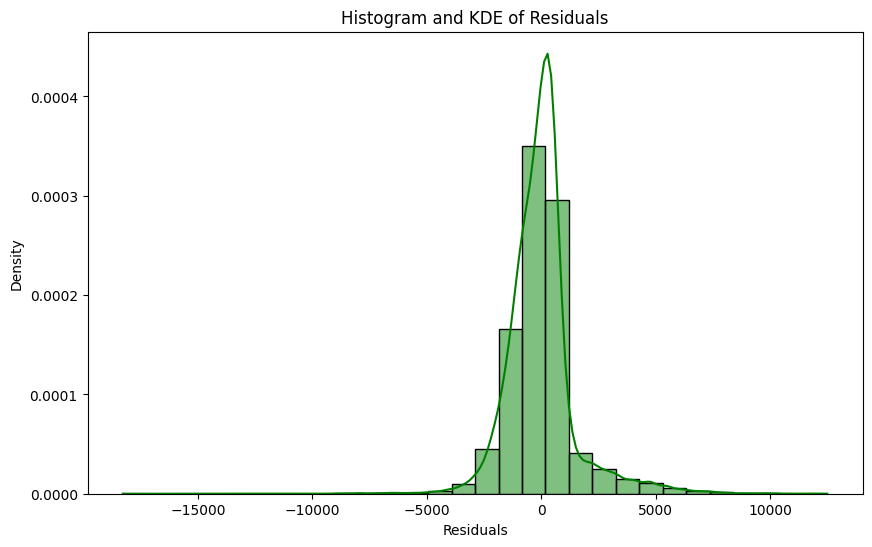

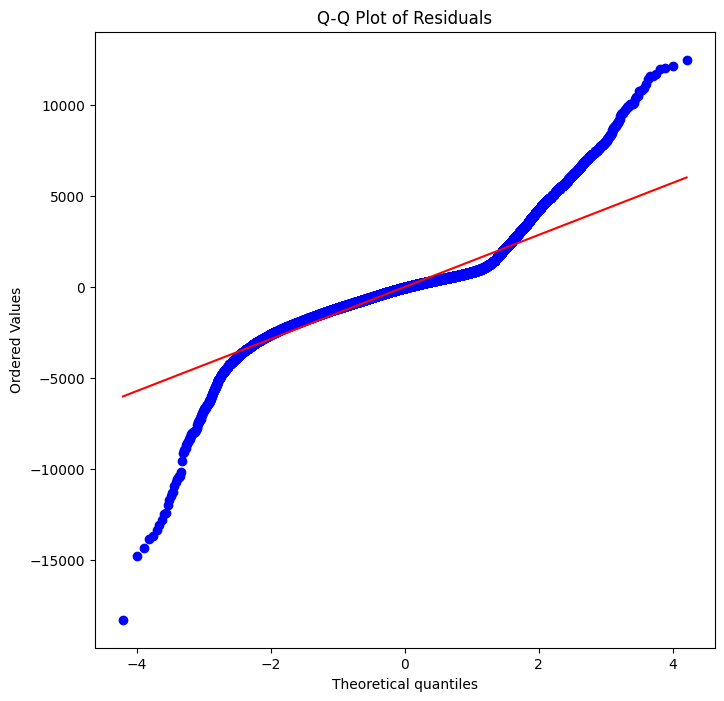

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats as stats

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat', 'depth', 'table']].dropna()
y = diamonds['price'].loc[X.index]  # Ensure y matches the rows of X

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

residuals = model.resid

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='green', stat='density')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram and KDE of Residuals')
plt.show()

plt.figure(figsize=(8, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


##2. Write a Python Script to calcualte and print MSE, MAE, and RMSE for a Linear Regression Model.

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat', 'depth', 'table']].dropna()
y = diamonds['price'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 2333883.18
Mean Absolute Error (MAE): 994.74
Root Mean Squared Error (RMSE): 1527.71


##3.  Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

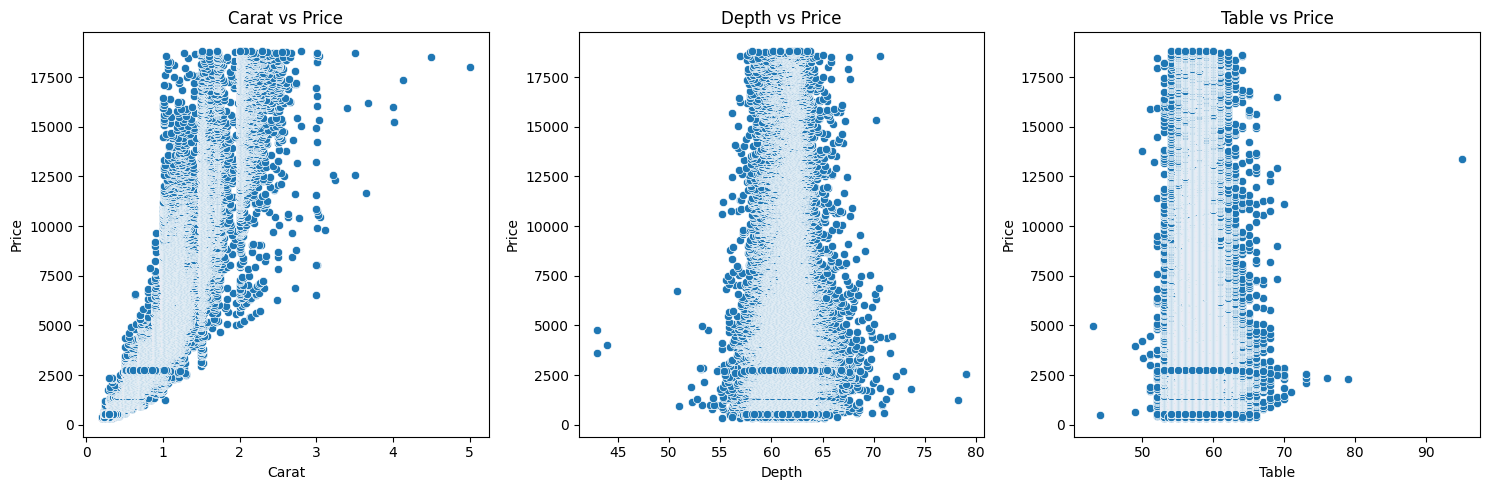

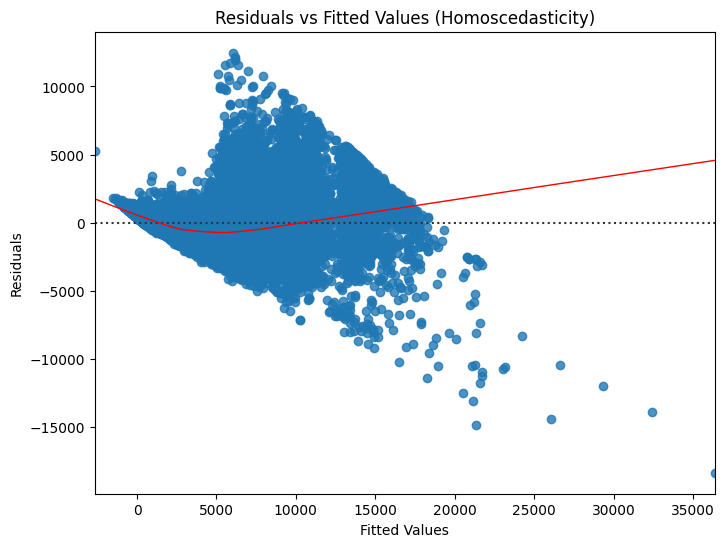

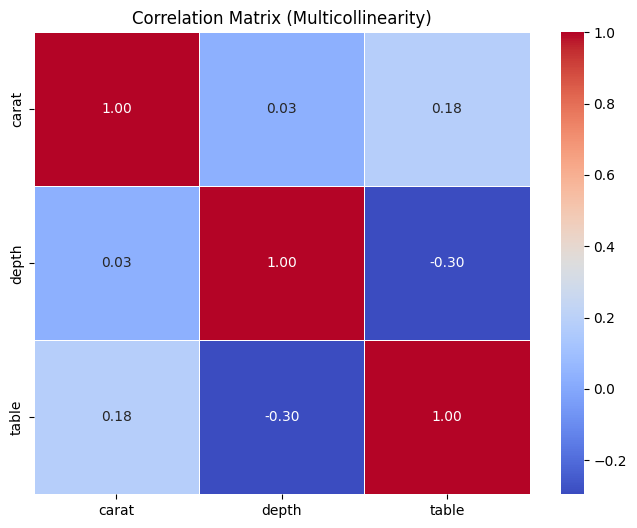

In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat', 'depth', 'table']].dropna()
y = diamonds['price'].loc[X.index]  # Ensure y matches the rows of X

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X['carat'], y=y)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X['depth'], y=y)
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X['table'], y=y)
plt.title('Table vs Price')
plt.xlabel('Table')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

X_with_const = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_with_const.loc[X_train.index]).fit()

residuals = model.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted Values (Homoscedasticity)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Multicollinearity)')
plt.show()


4. Write a Python script that created a machine learning pipline with feature scaling and evaluated the performance of different regression models.

In [12]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat', 'depth', 'table']].dropna()
y = diamonds['price'].loc[X.index]  # Ensure y matches the rows of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('regressor', model)           # Regression model
    ])

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    mean_mse = -cv_scores.mean()  # Negate to get positive MSE
    rmse = np.sqrt(mean_mse)  # Root Mean Squared Error

    print(f"{model_name}:")
    print(f"  Mean MSE: {mean_mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print('-' * 50)

best_model = LinearRegression()  # Assume Linear Regression is the best model
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', best_model)
])

best_pipeline.fit(X_train, y_train)

y_pred = best_pipeline.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

print(f"\nBest Model (Linear Regression) - Test Set Evaluation:")
print(f"  Test MSE: {mse_test:.2f}")
print(f"  Test RMSE: {rmse_test:.2f}")


Linear Regression:
  Mean MSE: 2328557.03
  RMSE: 1525.96
--------------------------------------------------
Ridge Regression:
  Mean MSE: 2328556.97
  RMSE: 1525.96
--------------------------------------------------
Lasso Regression:
  Mean MSE: 2328560.70
  RMSE: 1525.96
--------------------------------------------------

Best Model (Linear Regression) - Test Set Evaluation:
  Test MSE: 2333883.18
  Test RMSE: 1527.71


##5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat']].dropna()  # Only use 'carat' as the feature
y = diamonds['price'].loc[X.index]  # Ensure y matches the rows of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Model Coefficient: {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")


Model Coefficient: 7768.91
Model Intercept: -2261.91
R-squared Score: 0.85


##6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results

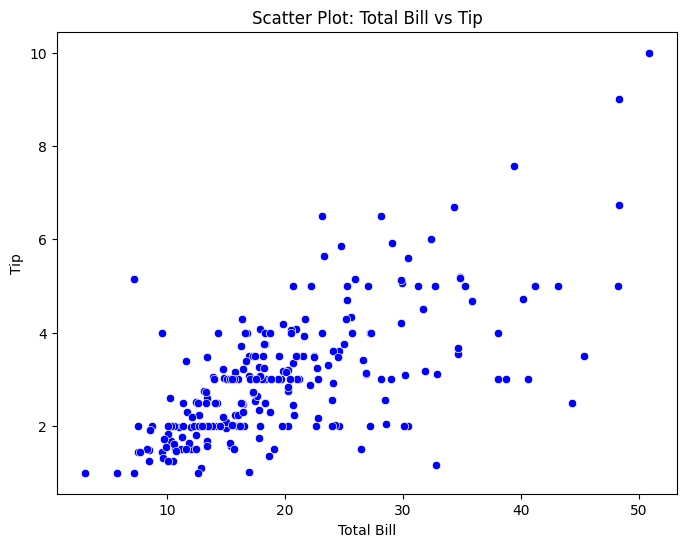

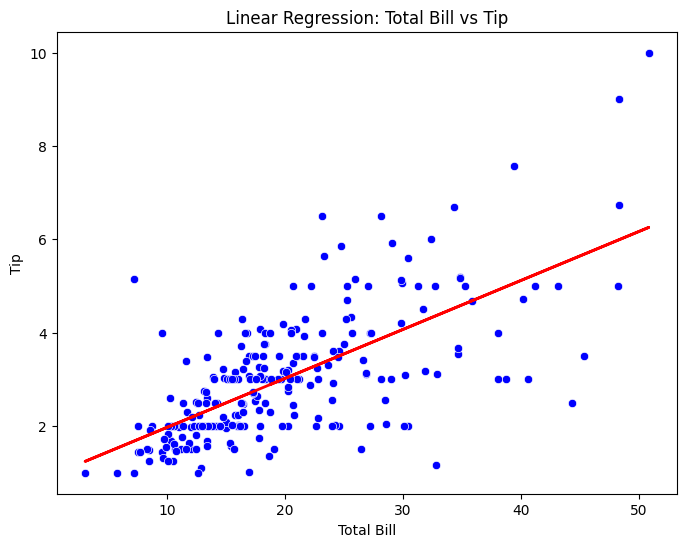

Model Coefficient (Slope): 0.11
Model Intercept: 0.92
R-squared Score: 0.46


In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

tips = sns.load_dataset('tips')

X = tips[['total_bill']]  # Independent variable
y = tips['tip']           # Dependent variable

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)  # Regression line
plt.title('Linear Regression: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y, y_pred):.2f}")


##7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

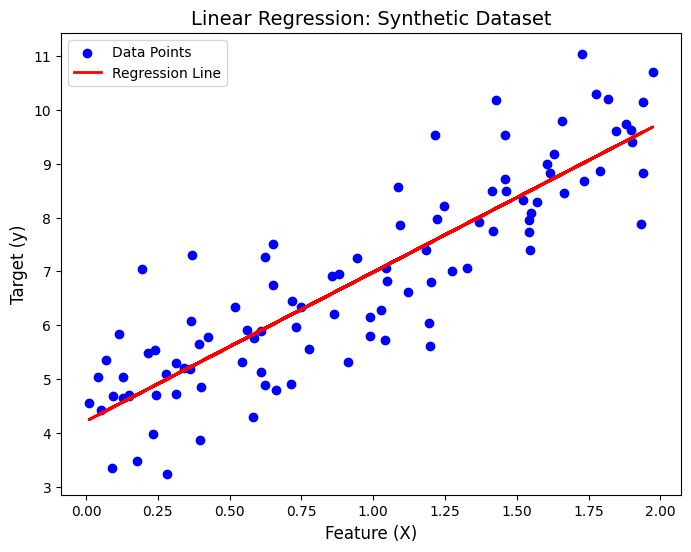

Model Coefficient (Slope): 2.77
Model Intercept: 4.22


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # Feature with random values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # Target variable with some noise

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))

plt.scatter(X, y, color='blue', label='Data Points')

plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)

plt.title('Linear Regression: Synthetic Dataset', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()

plt.show()

print(f"Model Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


##8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [17]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Generate or load a dataset (using Seaborn's 'tips' dataset for simplicity)
tips = sns.load_dataset('tips')

# Feature: 'total_bill', Target: 'tip'
X = tips[['total_bill']]  # Independent variable
y = tips['tip']           # Dependent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved to 'linear_regression_model.pkl'")

# To demonstrate how to load the pickled model, let's load it back
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Print the model's coefficients and R-squared score
print(f"Model Coefficient (Slope): {loaded_model.coef_[0]:.2f}")
print(f"Model Intercept: {loaded_model.intercept_:.2f}")
print(f"R-squared Score: {loaded_model.score(X_test, y_test):.2f}")


Model has been pickled and saved to 'linear_regression_model.pkl'
Model Coefficient (Slope): 0.11
Model Intercept: 0.93
R-squared Score: 0.54


##9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

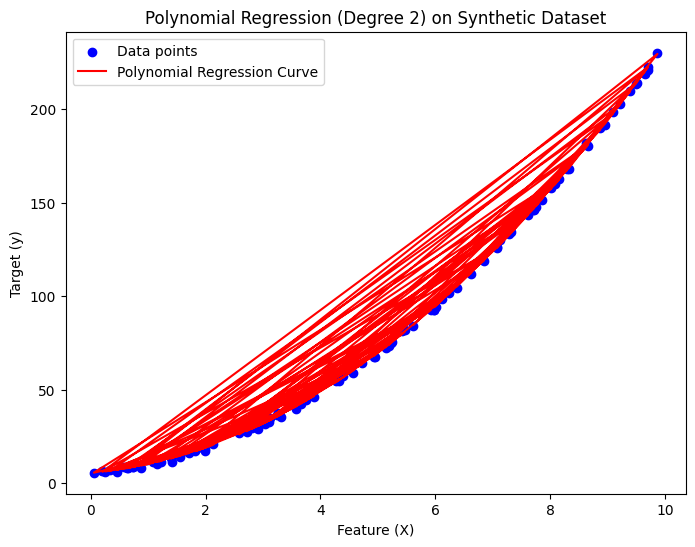

Model Coefficients: [[0.         2.72777588 2.02324255]]
Model Intercept: [5.56140272]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (feature)
y = 2 * (X ** 2) + 3 * X + 5 + np.random.randn(100, 1)  # Dependent variable with noise

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 2) on Synthetic Dataset')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


##10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data for simple linear regression
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Independent variable (random values between 0 and 10)
y = 3 * X + 5 + np.random.randn(100, 1)  # Dependent variable: y = 3 * X + 5 + noise

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model's coefficient (slope) and intercept
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


Model Coefficient (Slope): 2.95
Model Intercept: 5.22


##11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

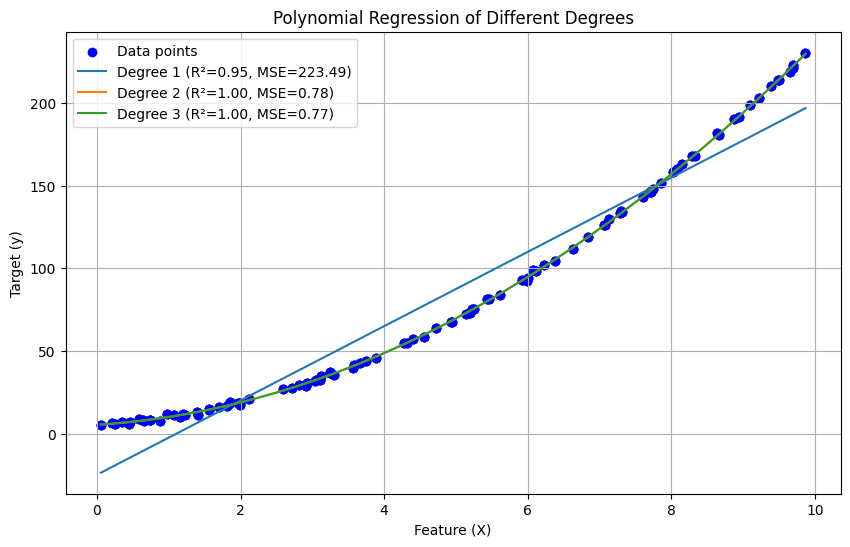

Degree 1:
  R-squared: 0.95
  Mean Squared Error (MSE): 223.49
----------------------------------------
Degree 2:
  R-squared: 1.00
  Mean Squared Error (MSE): 0.78
----------------------------------------
Degree 3:
  R-squared: 1.00
  Mean Squared Error (MSE): 0.77
----------------------------------------


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data with a nonlinear relationship (quadratic)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature: Random values between 0 and 10
y = 2 * (X ** 2) + 3 * X + 5 + np.random.randn(100, 1)  # Target: y = 2*X^2 + 3*X + 5 with noise

# Function to fit polynomial regression models and evaluate performance
def fit_and_evaluate_polynomial_regression(X, y, degree):
    # Transform the feature to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict using the trained model
    y_pred = model.predict(X_poly)

    # Calculate R-squared and Mean Squared Error (MSE)
    r_squared = model.score(X_poly, y)
    mse = mean_squared_error(y, y_pred)

    return model, r_squared, mse, X_poly, y_pred

# Degrees to compare
degrees = [1, 2, 3]

# Plotting
plt.figure(figsize=(10, 6))

# Compare models of different degrees
for degree in degrees:
    model, r_squared, mse, X_poly, y_pred = fit_and_evaluate_polynomial_regression(X, y, degree)

    # Plot the data points
    plt.scatter(X, y, color='blue', label='Data points' if degree == 1 else "")

    # Sort the values of X for smooth plotting
    X_sorted = np.sort(X, axis=0)
    poly = PolynomialFeatures(degree=degree)
    X_sorted_poly = poly.fit_transform(X_sorted)

    # Plot the regression curve
    plt.plot(X_sorted, model.predict(X_sorted_poly), label=f'Degree {degree} (R²={r_squared:.2f}, MSE={mse:.2f})')

# Customize the plot
plt.title('Polynomial Regression of Different Degrees')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print evaluation metrics for each model
for degree in degrees:
    model, r_squared, mse, _, _ = fit_and_evaluate_polynomial_regression(X, y, degree)
    print(f"Degree {degree}:")
    print(f"  R-squared: {r_squared:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print("-" * 40)


##12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data for simple linear regression with two features
np.random.seed(42)  # For reproducibility
X1 = np.random.rand(100, 1) * 10  # Feature 1 (random values between 0 and 10)
X2 = np.random.rand(100, 1) * 5   # Feature 2 (random values between 0 and 5)
X = np.hstack((X1, X2))  # Combine the two features into one dataset

# Generate dependent variable 'y' based on a linear combination of X1 and X2
y = 3 * X1 + 2 * X2 + 5 + np.random.randn(100, 1)  # y = 3*X1 + 2*X2 + 5 with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")


Model Coefficients: [[2.97500221 2.15743475]]
Model Intercept: [4.79325749]
R-squared Score: 0.99


##13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

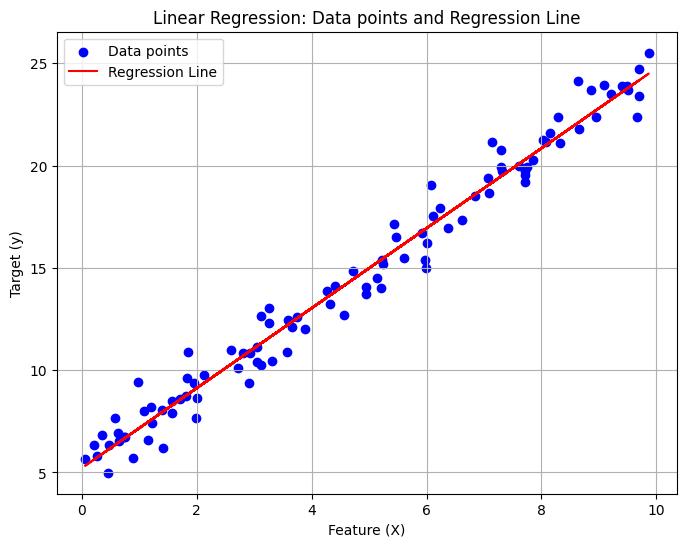

Model Coefficient (Slope): 1.95
Model Intercept: 5.22


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Feature (random values between 0 and 10)
y = 2 * X + 5 + np.random.randn(100, 1)  # Target: y = 2*X + 5 with some noise

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions (regression line)
y_pred = model.predict(X)

# Step 4: Visualize the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot data points
plt.plot(X, y_pred, color='red', label='Regression Line')  # Plot regression line
plt.title('Linear Regression: Data points and Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


##14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
\
import seaborn as sns
data = sns.load_dataset('iris')

data_numeric = data.drop(columns=['species'])  # Drop the categorical column

X = add_constant(data_numeric)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



##5. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

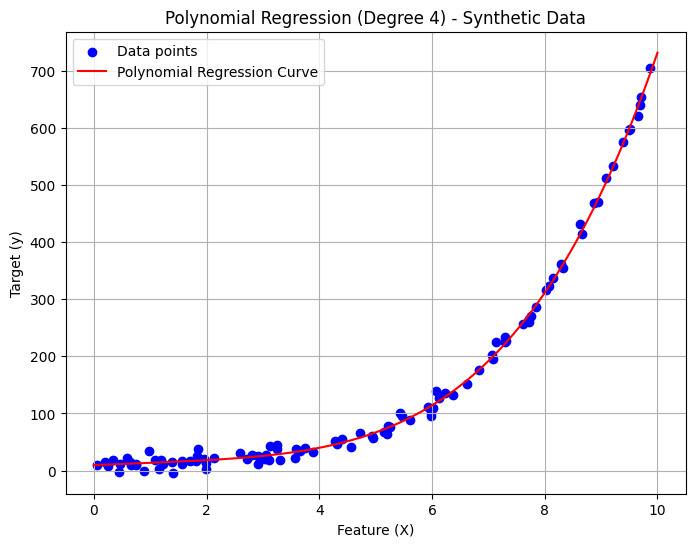

Model Coefficients: [[ 0.          3.8616078   0.16600212 -0.1265785   0.07934888]]
Model Intercept: [9.45124216]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Feature: random values between 0 and 10
y = 0.1 * X**4 - 0.5 * X**3 + 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 10

poly = PolynomialFeatures(degree=4)  # Degree of polynomial
X_poly = poly.fit_transform(X)  # Transform feature to polynomial features
model = LinearRegression()  # Initialize linear regression model
model.fit(X_poly, y)  # Train the model on polynomial features

X_range = np.linspace(0, 10, 1000).reshape(-1, 1)  # Range for plotting the curve
X_range_poly = poly.transform(X_range)  # Transform the range to polynomial features
y_range = model.predict(X_range_poly)  # Predict using the trained model

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X_range, y_range, color='red', label='Polynomial Regression Curve')  # Plot the regression curve
plt.title('Polynomial Regression (Degree 4) - Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


##16.  Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', LinearRegression())  # Fit a linear regression model
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R-squared score: {r2:.4f}')


R-squared score: 1.0000


##17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

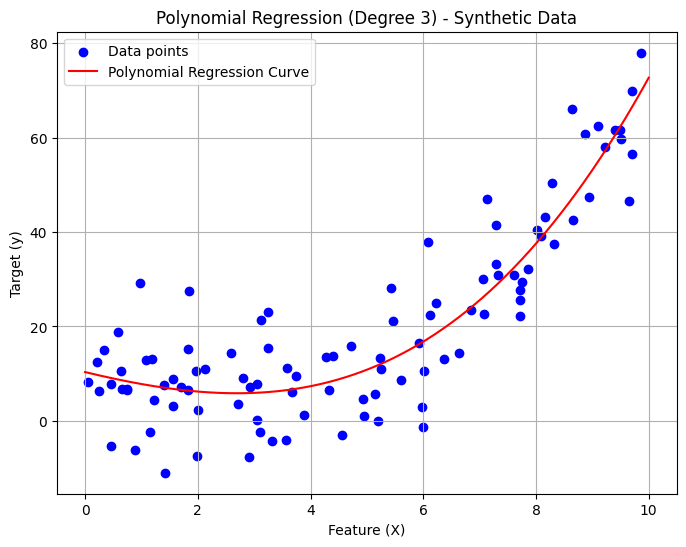

Model Coefficients: [[ 0.         -2.87414005  0.27871563  0.06321596]]
Model Intercept: [10.34459907]


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Feature: random values between 0 and 10
y = 0.1 * X**3 - 0.5 * X**2 + 2 * X + 3 + np.random.randn(100, 1) * 10

poly = PolynomialFeatures(degree=3)  # Degree of polynomial
X_poly = poly.fit_transform(X)  # Transform the feature into polynomial features

model = LinearRegression()
model.fit(X_poly, y)

X_range = np.linspace(0, 10, 1000).reshape(-1, 1)  # Range for plotting the curve
X_range_poly = poly.transform(X_range)  # Transform the range to polynomial features
y_range = model.predict(X_range_poly)  # Predict using the trained model

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X_range, y_range, color='red', label='Polynomial Regression Curve')  # Plot the regression curve
plt.title('Polynomial Regression (Degree 3) - Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


##18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features (random values between 0 and 10)
y = 2 * X[:, 0] + 3 * X[:, 1] - 4 * X[:, 2] + 1 * X[:, 3] + 5 * X[:, 4] + np.random.randn(100) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R-squared score: {r2:.4f}')
print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')


R-squared score: 0.9315
Model Coefficients: [ 1.88036326  2.78146763 -3.73481784  1.11251003  4.75593577]
Model Intercept: 1.299342440061526


##19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line

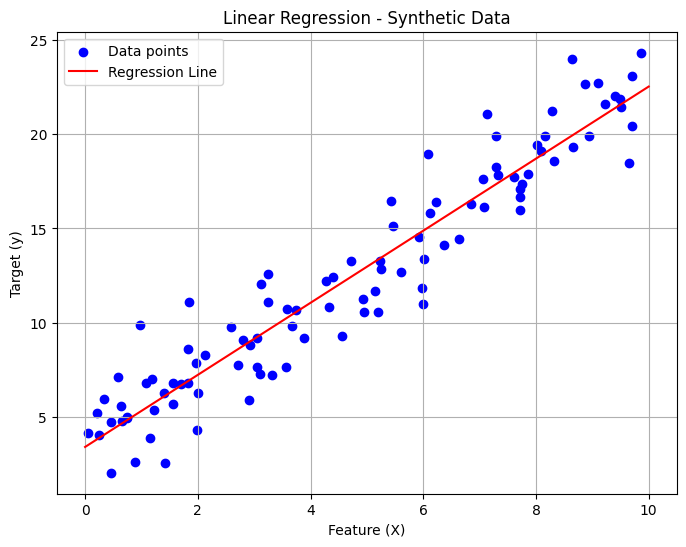

Model Coefficient: 1.9080
Model Intercept: 3.4302


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, feature between 0 and 10
y = 2 * X + 3 + np.random.randn(100, 1) * 2  # Linear relationship with some noise

model = LinearRegression()
model.fit(X, y)

X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Range of values for the feature
y_pred = model.predict(X_range)  # Predict corresponding values of y

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X_range, y_pred, color='red', label='Regression Line')  # Plot the regression line
plt.title('Linear Regression - Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(f'Model Coefficient: {model.coef_[0][0]:.4f}')
print(f'Model Intercept: {model.intercept_[0]:.4f}')


##20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 3) * 10  # 100 samples, 3 features (random values between 0 and 10)
y = 3 * X[:, 0] - 2 * X[:, 1] + 4 * X[:, 2] + 10 + np.random.randn(100) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R-squared score: {r2:.4f}')
print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')


R-squared score: 0.8495
Model Coefficients: [ 3.08529867 -2.06727034  4.35548664]
Model Intercept: 9.601847893067351


##21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import joblib  # Import joblib for serialization

X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'linear_regression_model.joblib')  # Save the model to a file

loaded_model = joblib.load('linear_regression_model.joblib')  # Load the model from the file

y_pred = loaded_model.predict(X_test)

print(f'Model Coefficients: {loaded_model.coef_}')
print(f'Model Intercept: {loaded_model.intercept_}')
print(f'R-squared score: {loaded_model.score(X_test, y_test):.4f}')


Model Coefficients: [28.19696539 75.05538132 17.74730434]
Model Intercept: 0.00919427259135075
R-squared score: 1.0000


##22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [35]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

tips = sns.load_dataset('tips')

tips_encoded = pd.get_dummies(tips, drop_first=True)  # One-hot encode categorical features and drop the first category to avoid multicollinearity

X = tips_encoded.drop('tip', axis=1)  # Dropping the target variable ('tip')
y = tips_encoded['tip']  # Target variable is the 'tip'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared score: {r2:.4f}')


Model Coefficients: [ 0.09639327  0.27281191 -0.07177159  0.30159452  0.25205551  0.11064849
  0.05388456 -0.18411166]
Model Intercept: 0.3219761395943612
Mean Squared Error (MSE): 0.9318
R-squared score: 0.2931


##23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Linear Regression Coefficients: {linear_model.coef_}")
print(f"R-squared score (Linear Regression): {r2_linear:.4f}\n")

print(f"Ridge Regression Coefficients: {ridge_model.coef_}")
print(f"R-squared score (Ridge Regression): {r2_ridge:.4f}")


Linear Regression Coefficients: [60.5858214  98.65156981 64.55135116 57.06083864 35.61128852]
R-squared score (Linear Regression): 1.0000

Ridge Regression Coefficients: [59.81710072 96.9790754  62.99754223 56.33329014 35.20972761]
R-squared score (Ridge Regression): 0.9997


##24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

model = LinearRegression()


cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R-squared score: {cv_scores.mean():.4f}')


Cross-validation R-squared scores: [0.99999931 0.99999901 0.99999977 0.99999917 0.99999934]
Mean R-squared score: 1.0000


##25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

Degree 1 Polynomial Regression R-squared: 0.7776
Degree 2 Polynomial Regression R-squared: 0.8016
Degree 3 Polynomial Regression R-squared: 0.7944
Degree 4 Polynomial Regression R-squared: 0.7527


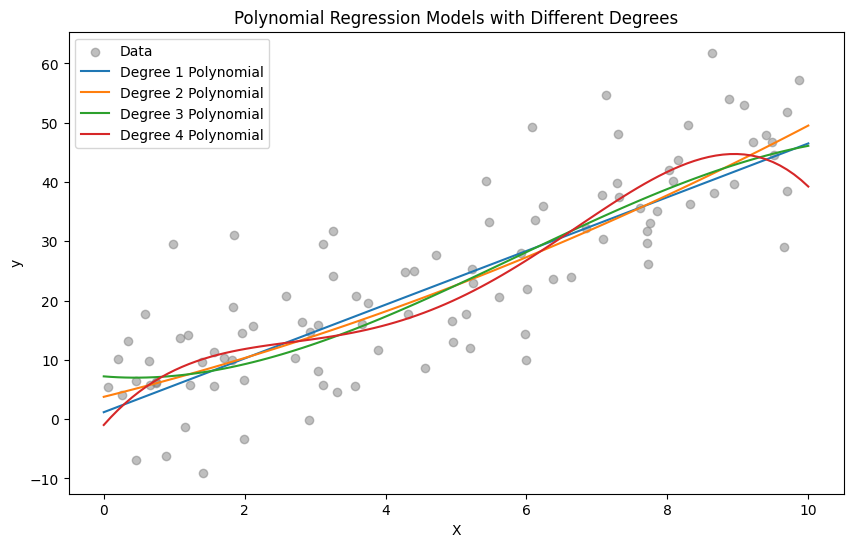

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random values for X between 0 and 10
y = 5 * X + np.random.randn(100, 1) * 10  # Linear relationship with noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def polynomial_regression(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)

    r2 = r2_score(y_test, y_pred)
    return r2, model, poly

degrees = [1, 2, 3, 4]
r2_scores = []

for degree in degrees:
    r2, model, poly = polynomial_regression(degree, X_train, y_train, X_test, y_test)
    r2_scores.append(r2)
    print(f"Degree {degree} Polynomial Regression R-squared: {r2:.4f}")

plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='gray', alpha=0.5, label='Data')

x_range = np.linspace(0, 10, 100).reshape(-1, 1)
for degree in degrees:
    _, model, poly = polynomial_regression(degree, X_train, y_train, X_test, y_test)
    y_poly_pred = model.predict(poly.transform(x_range))
    plt.plot(x_range, y_poly_pred, label=f'Degree {degree} Polynomial')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Models with Different Degrees')
plt.legend()
plt.show()
